In [1]:
import pandas as pd

names = ['Sex', 'Length', 'Diameter', 'Height', \
    'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
features = pd.read_csv('abalone/abalone.data', names=names)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

The equation is Diameter = 0.8155 * Length + -0.0194
The correlation coefficient is: 0.9868


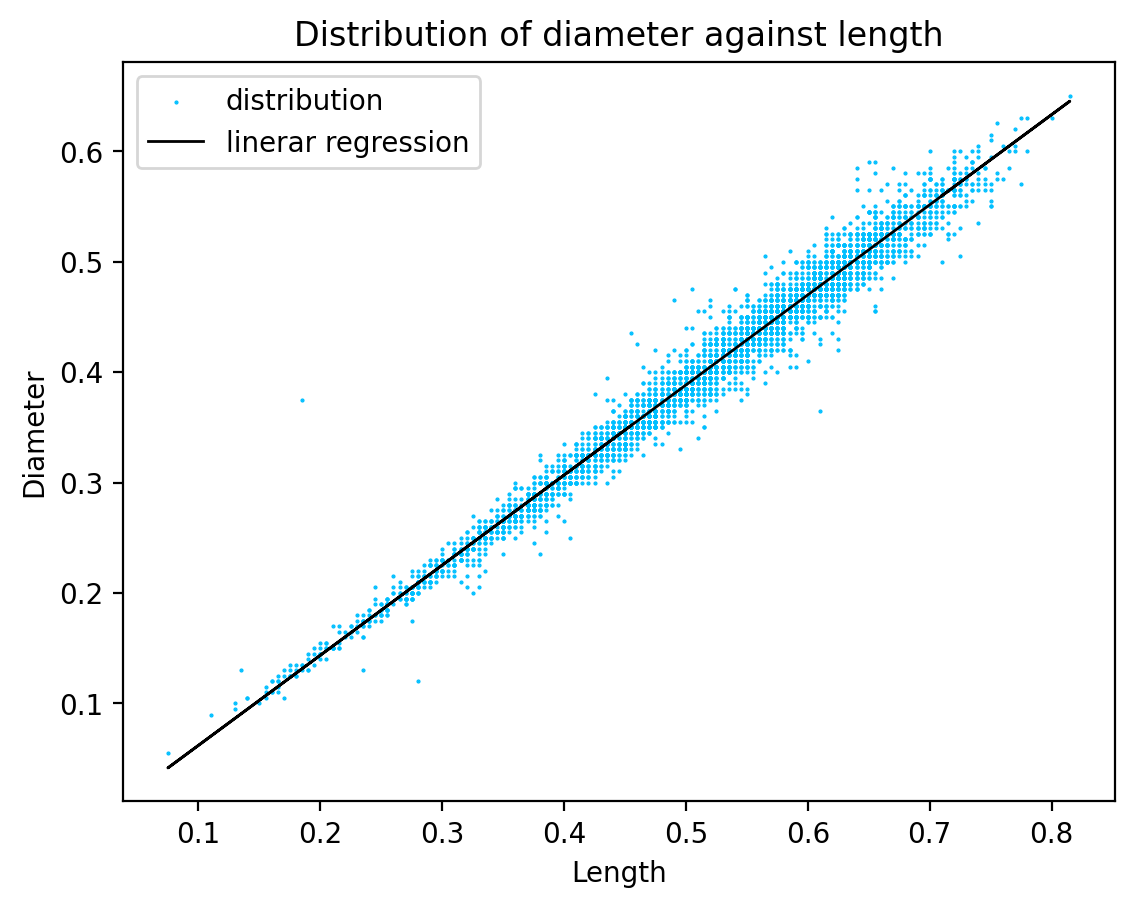

In [85]:
y = features.Diameter
x = features.Length

plt.figure(dpi=200)
plt.title("Distribution of diameter against length")
plt.ylabel("Diameter")
plt.xlabel("Length")
plt.scatter(x, y, color='deepskyblue', marker='.', s=1)
m, b = np.polyfit(x, y, 1)
cc = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='black', linewidth=1)
plt.legend(['distribution', 'linerar regression'])
print("The equation is Diameter = {:.4f} * Length + {:.4f}".format(m, b))
print("The correlation coefficient is: {:.4f}".format(cc[0, 1]))

In [157]:
pieces = ['Shucked_weight', 'Viscera_weight', 'Shell_weight']

y = features.Whole_weight
x = features[pieces]
X = np.concatenate((np.ones((len(x), 1)), x), axis=1)

w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, y))
y_bar = []
for index, row in features.iterrows():
    y_bar.append(row['Shucked_weight'] * w[1] + row['Viscera_weight'] * w[2] + row['Shell_weight'] * w[3] + w[0])
cc = np.corrcoef(y_bar, y)
print("Whole = {:.4f} * Shucked + {:.4f} * Viscera + {:.4f} * Shell + {:.4f}".format(w[1], w[2], w[3], w[0]))
print("The correlation coefficient of this multilinear model is: {:.4f}".format(cc[0, 1]))

Whole = 0.9366 * Shucked + 1.1116 * Viscera + 1.2530 * Shell + -0.0078
The correlation coefficient of this multilinear model is: 0.9954


In [142]:
count_odd_cases = 0

for index, row in features.iterrows():
    whole_weight = row['Whole_weight']
    sum_weight = sum(row[pieces])
    if sum_weight < whole_weight * 0.90 or sum_weight > whole_weight * 1.10:
        count_odd_cases += 1
    count_all += 1

print("For {} out of the {} abalones, whole weight is not the sum of pieces.".format(
    count_odd_cases, len(features.index)))

For 540 out of the 4177 abalones, whole weight is not the sum of pieces.


In [144]:
sum_of_weight = features[pieces].sum(axis=1)
cc = np.corrcoef(features.Whole_weight, sum_of_weight)
print("The correlation coefficient of whole weight and sum of pieces is {:.4f}".format(cc[0, 1]))

The correlation coefficient of whole weight and sum of pieces is 0.9951


Simple Linear model: Weight = 4.5731 * Diameter + -1.0365
Correlation coefficient for simple linear model is: 0.9255


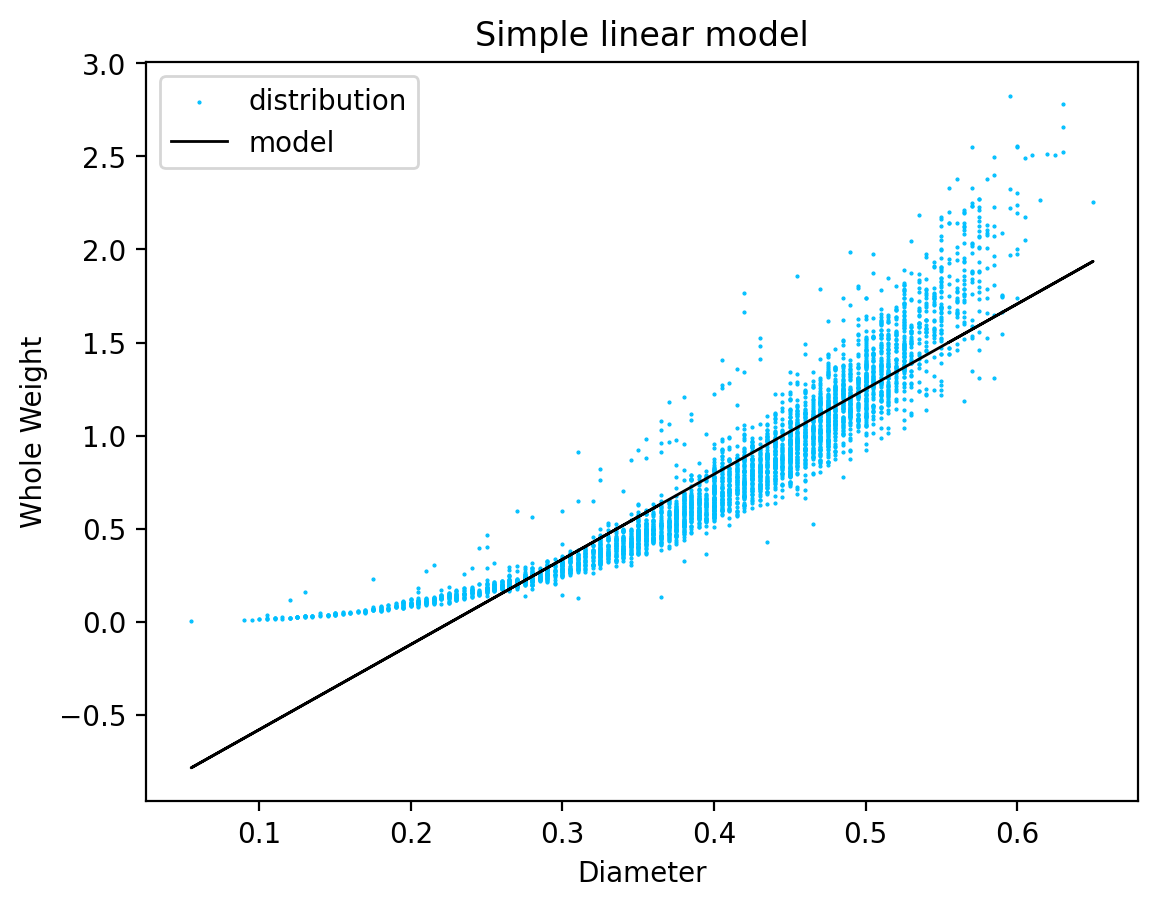

In [130]:
x = features.Diameter
y = features.Whole_weight

plt.figure(dpi=200)

plt.title("Simple linear model")
plt.xlabel("Diameter")
plt.ylabel("Whole Weight")
plt.scatter(x, y, color='deepskyblue', marker='.', s=1)

a, b = np.polyfit(x, y, 1)
cc = np.corrcoef(x, y)
plt.plot(x, a*x+b, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Simple Linear model: Weight = {:.4f} * Diameter + {:.4f}".format(a, b))
print("Correlation coefficient for simple linear model is: {:.4f}".format(cc[0, 1]))

Quadratic model: Weight = -3.3555 * Diameter + 10.4968 * Diameter^2 + 0.3477
Correlation coefficient for quadratic model is: 0.9627


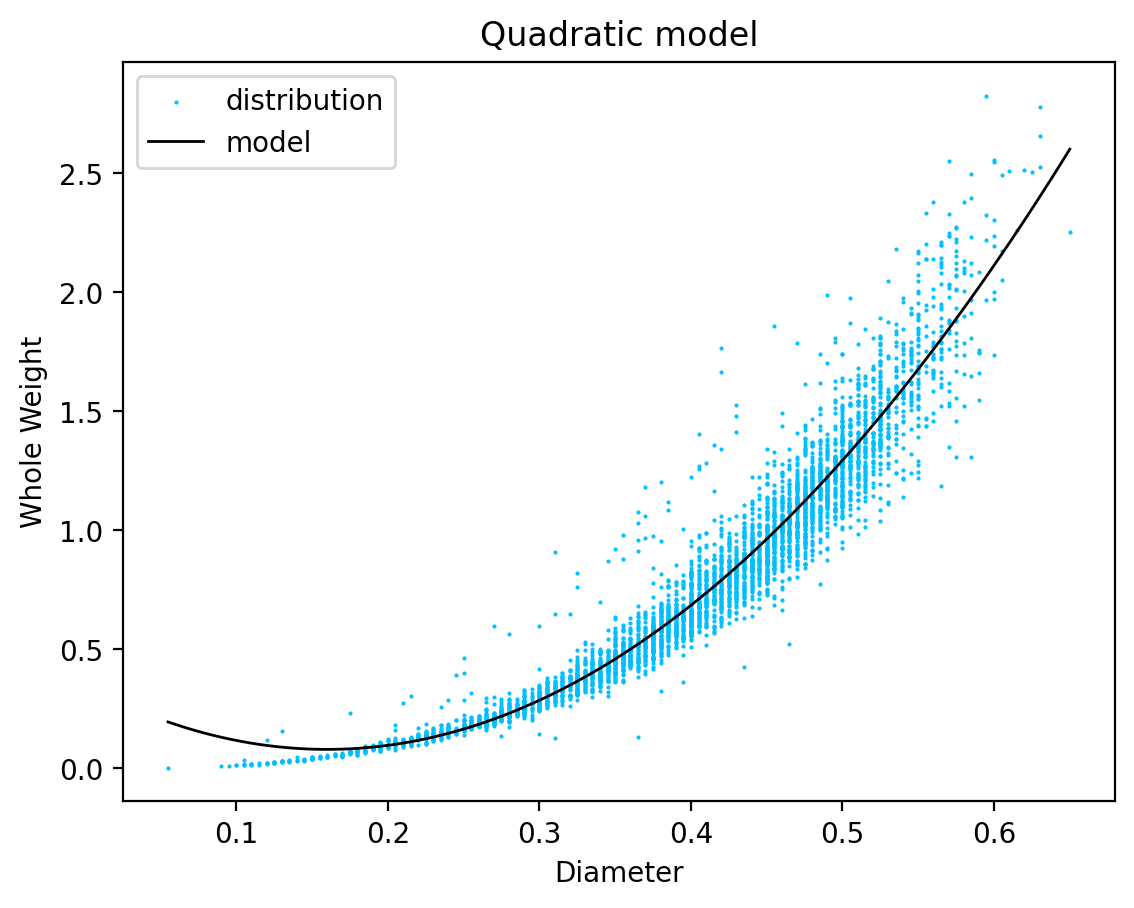

In [131]:
x = features.Diameter
y = features.Whole_weight

plt.figure(dpi=200)

plt.title("Quadratic model")
plt.xlabel("Diameter")
plt.ylabel("Whole Weight")
plt.scatter(x, y, color='deepskyblue', marker='.', s=1)

# X = np.array([[1, x_, pow(x_, 2)] for x_ in x])
# w = np.dot((np.linalg.inv(np.dot(X.T, X))), np.dot(X.T, y))
# a, b, c = w[1], w[2], w[0]
# y_bar = [np.dot(row.T, w) for row in X]
b, a, c = np.polyfit(x, y, 2)
y_bar = [(a * x_ + b * x_**2 + c) for x_ in x]
cc = np.corrcoef(y_bar, y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, a*x_+b*x_**2+c, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Quadratic model: Weight = {:.4f} * Diameter + {:.4f} * Diameter^2 + {:.4f}".format(a, b, c))
print("Correlation coefficient for quadratic model is: {:.4f}".format(cc[0, 1]))

Cubic model: Weight = 10.3376 * Diameter^3
Correlation coefficient for cubic model is: 0.9631


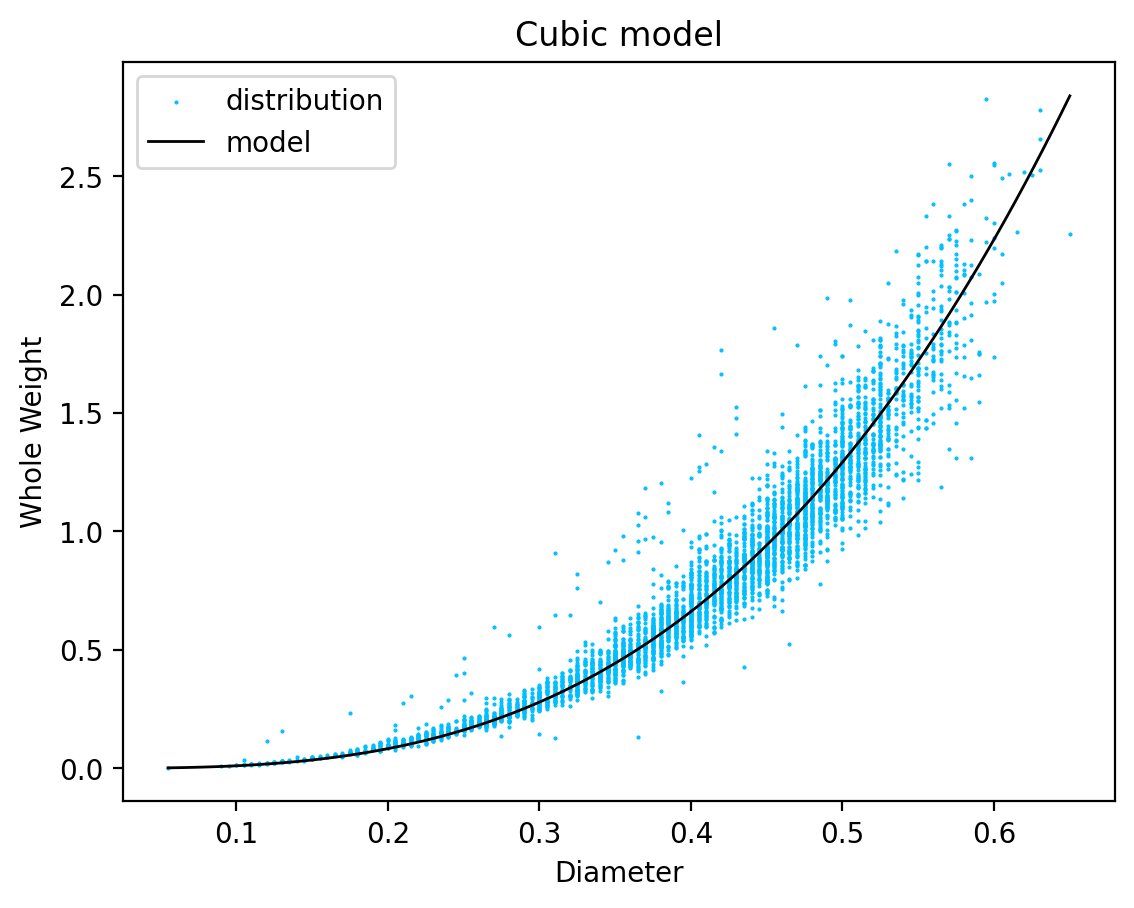

In [154]:
x = features.Diameter
y = features.Whole_weight

plt.figure(dpi=200)

plt.title("Cubic model")
plt.xlabel("Diameter")
plt.ylabel("Whole Weight")
plt.scatter(x, y, color='deepskyblue', marker='.', s=1)

X = np.power(x, 3).values.reshape(-1, 1)
a = np.dot(np.linalg.pinv(X), y)[0]
y_bar = [(a * x_**3) for x_ in x]
cc = np.corrcoef(y_bar, y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, a*x_**3, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Cubic model: Weight = {:.4f} * Diameter^3".format(a))
print("Correlation coefficient for cubic model is: {:.4f}".format(cc[0, 1]))

Cubic model: Weight = e ^ (8.1167 * x + -3.7510)
Correlation coefficient for exponential x is: 0.9465
Correlation coefficient for log y is: 0.9635


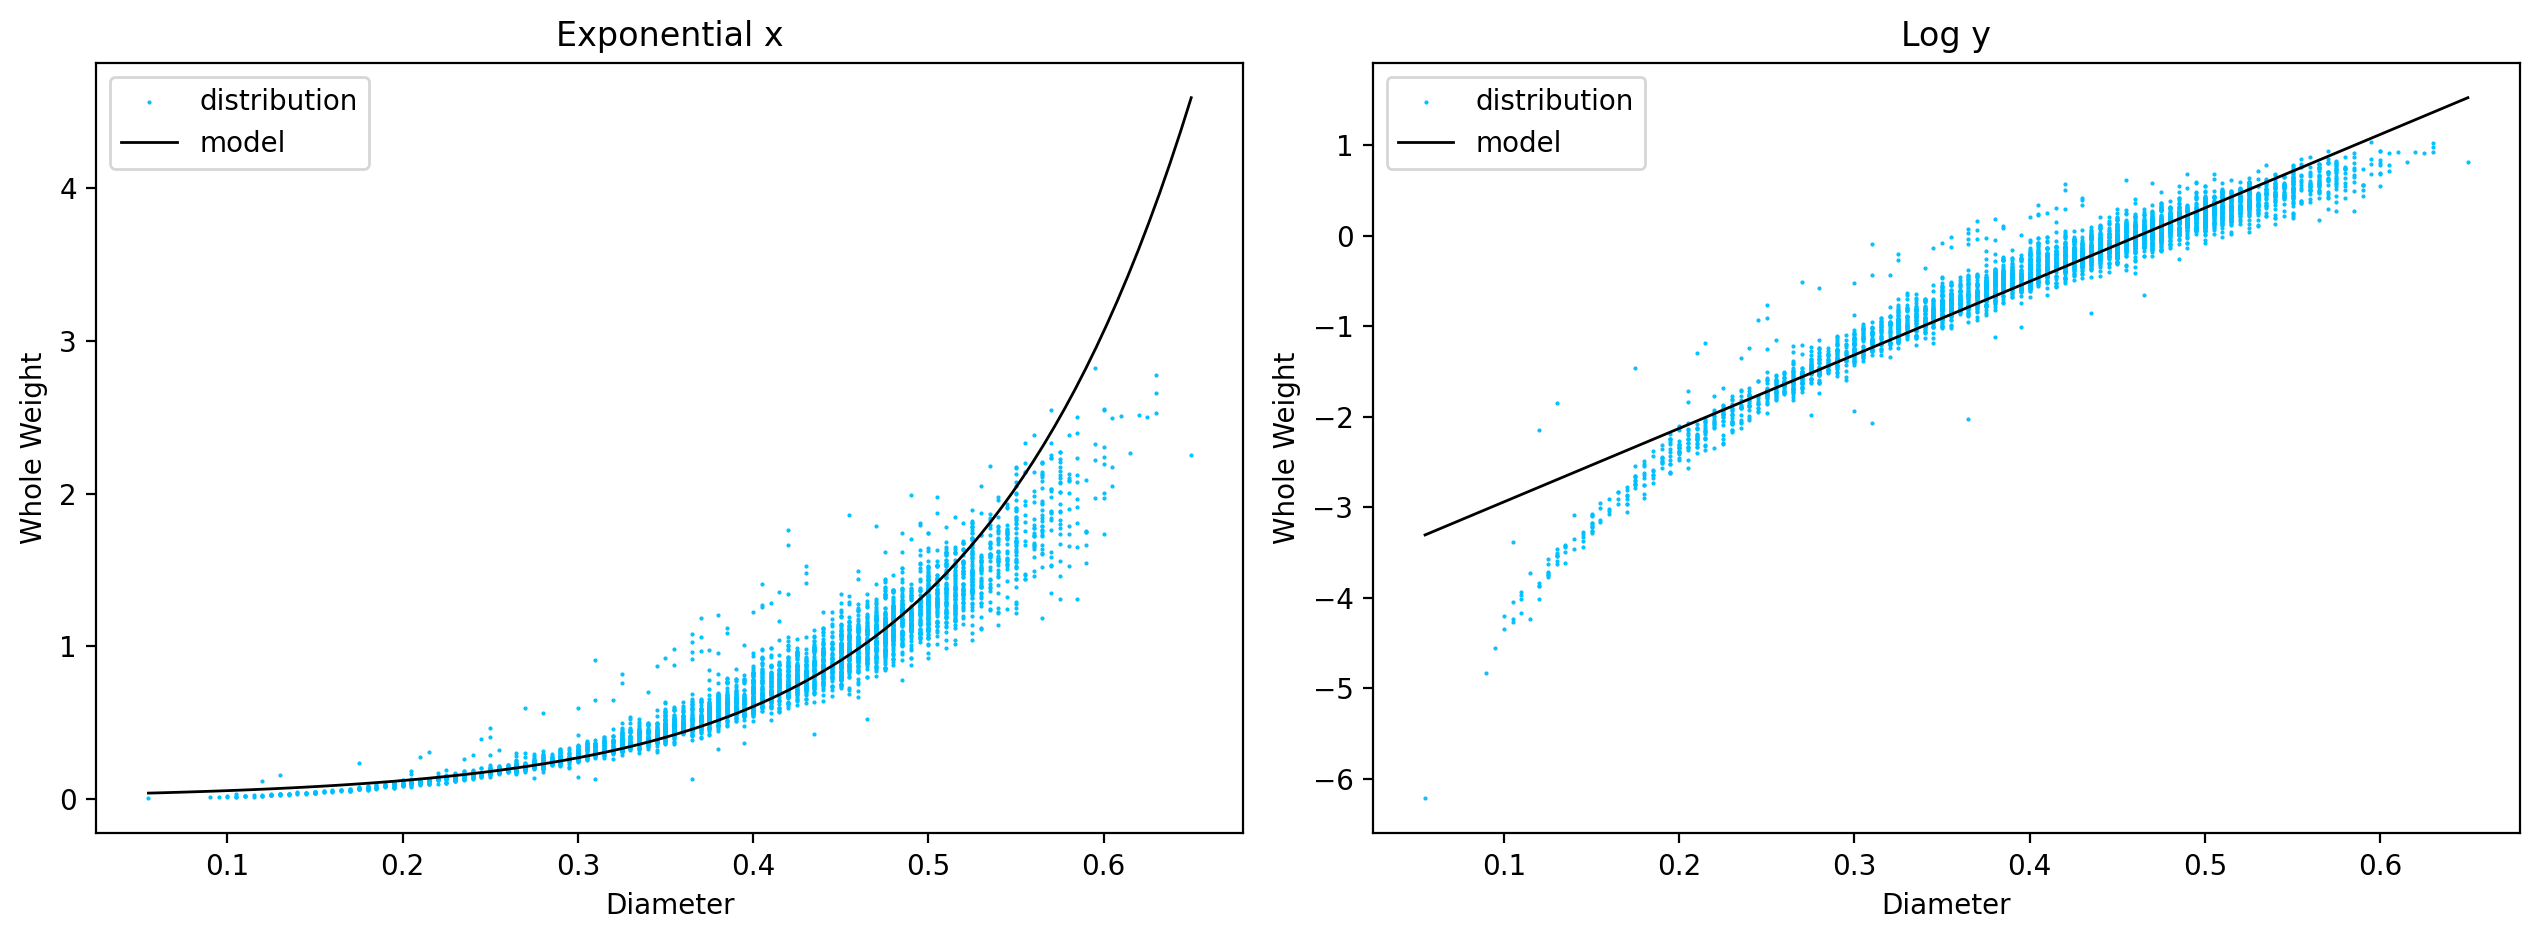

In [158]:
x = features.Diameter
y = features.Whole_weight

plt.figure(dpi=200, figsize=(12.8,4.8))

plt.subplot(1, 2, 1)
plt.title("Exponential x")
plt.xlabel("Diameter")
plt.ylabel("Whole Weight")
plt.scatter(x, y, color='deepskyblue', marker='.', s=1)

a, b = np.polyfit(x, np.log(y), 1)
cc = np.corrcoef(np.exp(a*x+b), y)
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, np.exp(a*x_+b), color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Cubic model: Weight = e ^ ({:.4f} * x + {:.4f})".format(a, b))
print("Correlation coefficient for exponential x is: {:.4f}".format(cc[0, 1]))

plt.subplot(1, 2, 2)
plt.title("Log y")
plt.xlabel("Diameter")
plt.ylabel("Whole Weight")
plt.scatter(x, np.log(y), color='deepskyblue', marker='.', s=1)

cc = np.corrcoef(x, np.log(y))
x_ = np.linspace(x.min(), x.max(), 100)
plt.plot(x_, a*x_+b, color='black', linewidth=1)
plt.legend(['distribution', 'model'])
print("Correlation coefficient for log y is: {:.4f}".format(cc[0, 1]))

plt.tight_layout()